# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Read-imcat-output-final.cat" data-toc-modified-id="Read-imcat-output-final.cat-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read imcat output final.cat</a></div><div class="lev1 toc-item"><a href="#Create-new-columns" data-toc-modified-id="Create-new-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create new columns</a></div><div class="lev1 toc-item"><a href="#Bucketing-equal-number-of-objects-in-bins-after-sorting-flux" data-toc-modified-id="Bucketing-equal-number-of-objects-in-bins-after-sorting-flux-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bucketing equal number of objects in bins after sorting flux</a></div><div class="lev1 toc-item"><a href="#Plot-Fluxes-in-each-bins-(x-axis=-flux/1000)" data-toc-modified-id="Plot-Fluxes-in-each-bins-(x-axis=-flux/1000)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Fluxes in each bins (x-axis= flux/1000)</a></div><div class="lev1 toc-item"><a href="#Look-at-objects-with-gm_sq-0.7-and-1.0" data-toc-modified-id="Look-at-objects-with-gm_sq-0.7-and-1.0-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Look at objects with gm_sq 0.7 and 1.0</a></div><div class="lev1 toc-item"><a href="#Look-at-the-bucket25-with-dense-population-at-gmSquared-0.7-to-1.0" data-toc-modified-id="Look-at-the-bucket25-with-dense-population-at-gmSquared-0.7-to-1.0-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Look at the bucket25 with dense population at gmSquared 0.7 to 1.0</a></div><div class="lev1 toc-item"><a href="#Fitting-cubic-function-after-bucketing" data-toc-modified-id="Fitting-cubic-function-after-bucketing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fitting cubic function after bucketing</a></div><div class="lev1 toc-item"><a href="#gm_sq_mean-vs-flux_mean-in-each-buckets" data-toc-modified-id="gm_sq_mean-vs-flux_mean-in-each-buckets-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>gm_sq_mean vs flux_mean in each buckets</a></div><div class="lev1 toc-item"><a href="#Attempt:-Fit-log-normal-distribution" data-toc-modified-id="Attempt:-Fit-log-normal-distribution-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Attempt: Fit log-normal distribution</a></div><div class="lev1 toc-item"><a href="#Attempt:-Fit-two-functions" data-toc-modified-id="Attempt:-Fit-two-functions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Attempt: Fit two functions</a></div><div class="lev2 toc-item"><a href="#Left-part" data-toc-modified-id="Left-part-111"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Left part</a></div><div class="lev2 toc-item"><a href="#Right-part" data-toc-modified-id="Right-part-112"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Right part</a></div>

# Introduction

Date: June 25, 2019 Tue

1. In jedisim we used ngals = 10k, z = 1.5 and did 100 simulations. jedisim gives l,l9,m,m9 for each 100 simulations.
2. In dmstack we create l.csv from l.fits and so on for 100*4 files, this file has 90 flags and 76 parameters.
3. After dmstack we clean and filter l.csv to get l.txt which have no nans, e <= 1.5,
   not psf candidate and have no child.
   This file has only few columns: id, x-y, errx-erry, e1-e2, sdssFlux.
4. We use these four l.txt, l9.txt, m.txt, m9.txt file in IMCAT and get final0.cat and combine 100 finalxx.cat to get 
   final.cat.
5. This lc catalog file final.cat has more columns than original 8 columns.
   ```
   id    00 10 20 30
   flux  00 10 20 30

   x  0 1
   gm 0 1
   gc 0 1
   
   errx 00 01 10 11 20 21 30 31
   g    00 01 10 11 20 21 30 31 # there is no erry here in imcat output
   
   So, in total there are
   2 * 4 + 3 * 2 + 2 * 8 = 8 + 6 + 16 = 30 columns in final.cat file.
   ```
   
   
**Purpose**  
- We want to test whether the e^2 is equally distributed in different flux bins of final.cat.  
- We will put equal number of objects in bins.  
- We will divide flux in multiple bins and find mean(e^2) and mean(flux) for each bins and try to get a fitting function.


Referecnes: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%207.ipynb
   

# Read imcat output final.cat

In [96]:
# !head -2 final_text.txt

In [2]:
# find number of lines
!wc -l final_text.txt

  183837 final_text.txt


In [97]:
# !tail -2 final_text.txt

In [4]:
# Now we will read file using pandas

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import scipy
import scipy.stats as stats

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 500)

# %load_ext version_information
# %version_information numpy,  scipy, pandas, sklearn, matplotlib, seaborn

In [43]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [44]:
# columns names
infile = 'final_text.txt'
headers = pd.read_csv(infile,sep=r'\s+',nrows=1).columns

headers = headers[1:] # remove first # column
headers

Index(['fN[0][0]', 'fN[1][0]', 'fN[2][0]', 'fN[3][0]', 'id[0][0]', 'id[1][0]',
       'id[2][0]', 'id[3][0]', 'x[0]', 'x[1]', 'errx[0][0]', 'errx[0][1]',
       'errx[1][0]', 'errx[1][1]', 'errx[2][0]', 'errx[2][1]', 'errx[3][0]',
       'errx[3][1]', 'g[0][0]', 'g[0][1]', 'g[1][0]', 'g[1][1]', 'g[2][0]',
       'g[2][1]', 'g[3][0]', 'g[3][1]', 'flux[0][0]', 'flux[1][0]',
       'flux[2][0]', 'flux[3][0]', 'gm[0]', 'gm[1]', 'gc[0]', 'gc[1]'],
      dtype='object')

In [45]:
df = pd.read_csv(infile,sep=r'\s+',comment='#',header=None)
df.columns = headers
print(df.shape)
df.head(2).append(df.tail(2))

(183836, 34)


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],flux[0][0],flux[1][0],flux[2][0],flux[3][0],gm[0],gm[1],gc[0],gc[1]
0,0,0,0,0,5678,5735,5568,5678,1969.21590,2159.75690,0.1046,0.0759,0.1063,0.0745,0.1055,0.0759,0.1070,0.0746,1.0830,-0.2341,1.1499,-0.4244,1.1705,-0.2617,1.2105,-0.4458,8119.9753,8214.5911,8109.6423,8206.3494,1.11645,-0.32925,1.19050,-0.35375
1,0,0,0,0,3181,3193,3164,3179,2222.70820,480.46175,0.0084,0.0080,0.0078,0.0086,0.0083,0.0080,0.0078,0.0086,0.4174,0.6428,-0.2249,-0.5265,0.4378,0.6521,-0.2665,-0.5215,53940.3420,53844.2740,53930.3800,53825.1630,0.09625,0.05815,0.08565,0.06530
183834,99,99,99,99,7429,7423,7347,7327,628.17332,3170.70070,0.0252,0.0236,0.0136,0.0172,0.0174,0.0145,0.0137,0.0173,0.4518,-0.5612,-0.4099,0.6419,0.4638,-0.5750,-0.4214,0.6486,65430.3410,65042.7170,65522.9630,65130.2340,0.02095,0.04035,0.02120,0.03680
183835,99,99,99,99,3565,487,3546,486,1012.99140,668.48905,0.1321,0.1634,0.2443,0.2245,0.1336,0.1664,0.1650,0.1341,0.0185,0.7450,0.3311,0.3349,0.0605,0.7665,0.3397,0.3455,7363.0329,8192.7381,7288.0971,7581.0610,0.17480,0.53995,0.20010,0.55600


# Create new columns

In [46]:
# Find total flux, gm**2 and gc**2
df['flux'] = df['flux[0][0]'] + df['flux[1][0]'] + df['flux[2][0]'] + df['flux[3][0]']
df['gm_sq'] = df['gm[0]']**2 + df['gm[1]']**2
df['gc_sq'] = df['gc[0]']**2 + df['gc[1]']**2
df.head()

,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],flux[0][0],flux[1][0],flux[2][0],flux[3][0],gm[0],gm[1],gc[0],gc[1],flux,gm_sq,gc_sq
0,0,0,0,0,5678,5735,5568,5678,1969.21590,2159.75690,0.1046,0.0759,0.1063,0.0745,0.1055,0.0759,0.1070,0.0746,1.0830,-0.2341,1.1499,-0.4244,1.1705,-0.2617,1.2105,-0.4458,8119.9753,8214.5911,8109.6423,8206.3494,1.11645,-0.32925,1.19050,-0.35375,32650.5581,1.354866,1.542429
1,0,0,0,0,3181,3193,3164,3179,2222.70820,480.46175,0.0084,0.0080,0.0078,0.0086,0.0083,0.0080,0.0078,0.0086,0.4174,0.6428,-0.2249,-0.5265,0.4378,0.6521,-0.2665,-0.5215,53940.3420,53844.2740,53930.3800,53825.1630,0.09625,0.05815,0.08565,0.06530,215540.1590,0.012645,0.011600
2,0,0,0,0,617,629,634,631,2490.22380,808.50175,0.1954,0.2183,0.1988,0.2101,0.1967,0.2164,0.1999,0.2103,-0.5360,-0.2100,-0.0658,-0.7159,-0.6352,-0.1759,-0.0540,-0.5692,1992.9584,2009.3786,1981.6793,2005.1267,-0.30090,-0.46295,-0.34460,-0.37255,7989.1430,0.304864,0.257543
3,0,0,0,0,684,696,699,698,3373.27020,905.54893,0.0547,0.0594,0.0549,0.0592,0.0547,0.0594,0.0550,0.0591,-0.6025,-0.0211,0.2921,-0.1267,-0.6900,-0.0190,0.3317,-0.3053,6554.3191,6547.4142,6556.4337,6549.9094,-0.15520,-0.07390,-0.17915,-0.16215,26208.0764,0.029548,0.058387
4,0,0,0,0,7439,7449,7225,7379,469.49428,3091.40550,0.1649,0.1191,0.1122,0.1652,0.1660,0.1190,0.1129,0.1656,0.8693,-0.5821,-0.8425,0.6476,0.8742,-0.5830,-0.8725,0.6541,5283.5760,5059.5502,5279.9345,5064.7001,0.01340,0.03275,0.00085,0.03555,20687.7608,0.001252,0.001265


In [47]:
# we want to find flux buckets, so sort the data by flux
df = df.sort_values(by='flux')
df.head(2).append(df.tail(2)).iloc[:,-5:]

,gc[0],gc[1],flux,gm_sq,gc_sq
180836,0.13805,-0.21480,3.517335e+03,0.023482,0.065197
24586,0.16295,0.23625,4.517341e+03,0.145381,0.082367
44153,-0.95505,0.05265,4.410982e+06,0.866382,0.914893
182110,0.81545,-0.54430,6.084687e+06,0.948599,0.961221


In [48]:
df.shape

(183836, 37)

In [49]:
df.flux.describe()

count    1.838360e+05
mean     1.408643e+05
std      2.657454e+05
min      3.517335e+03
25%      1.771650e+04
50%      3.720871e+04
75%      1.160867e+05
max      6.084687e+06
Name: flux, dtype: float64

In [50]:
# plt.plot(df.flux.values,'.')
# plt.xlabel('row_number')
# plt.ylabel('flux')

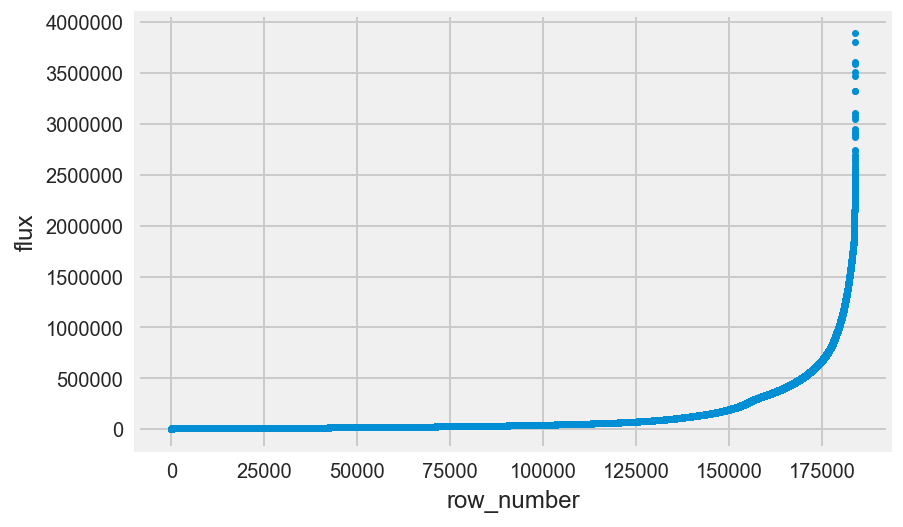

In [51]:
# looks like two data points are outliers, remove them
df = df.query('flux < 4e6')
plt.plot(df.flux.values,'.')
plt.xlabel('row_number')
plt.ylabel('flux')

# Bucketing equal number of objects in bins after sorting flux

In [53]:
# we have 183k objects we will distribute them in 30 bins after sorting flux

In [54]:
N_BUCKETS = 60
dfn = np.array_split(df,N_BUCKETS)
dfn[0].shape

(3064, 37)

In [18]:
dfn[0].head(2).append(dfn[0].tail(2))

,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],flux[0][0],flux[1][0],flux[2][0],flux[3][0],gm[0],gm[1],gc[0],gc[1],flux,gm_sq,gc_sq
180836,98,98,98,98,7597,7587,7519,7501,2193.6307,3159.44600,0.3857,0.3846,0.4108,0.4646,0.4264,0.4238,0.3999,0.4588,-0.1191,-0.0115,0.2466,-0.2672,-0.0457,-0.1852,0.3218,-0.2444,963.4867,859.7343,851.8551,842.2593,0.06375,-0.13935,0.13805,-0.21480,3517.3354,0.023482,0.065197
24586,13,13,13,13,3241,3245,3259,3255,1177.8090,467.15318,0.2720,0.3329,0.3182,0.3392,0.2715,0.3276,0.3589,0.3544,0.5301,-0.2305,0.1779,0.5138,0.4690,-0.2288,-0.1431,0.7013,1175.0578,1123.8657,1166.8635,1051.5544,0.35400,0.14165,0.16295,0.23625,4517.3414,0.145381,0.082367
128674,70,70,70,70,4773,4769,4740,4733,2931.3887,1399.98710,0.1616,0.1861,0.1582,0.1893,0.1614,0.1861,0.1588,0.1871,0.2638,0.4659,1.2354,-0.3073,0.1207,0.3705,1.0485,-0.1947,2014.5346,2005.4539,2010.7591,2004.1133,0.74960,0.07930,0.58460,0.08790,8034.8609,0.568189,0.349484
181140,98,98,98,98,6983,6977,6922,6907,2090.4889,3037.07160,0.1909,0.2232,0.1927,0.2074,0.1926,0.2230,0.1937,0.2091,-1.0325,-0.2315,-0.2223,-0.2734,-1.1582,-0.2505,-0.1654,-0.3214,2047.2099,1979.5441,2035.9307,1972.2503,-0.62740,-0.25245,-0.66180,-0.28595,8034.9350,0.457362,0.519747


In [19]:
df[df.flux == df.flux.min()] # min flux row lies in first bucket.

,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],flux[0][0],flux[1][0],flux[2][0],flux[3][0],gm[0],gm[1],gc[0],gc[1],flux,gm_sq,gc_sq
180836,98,98,98,98,7597,7587,7519,7501,2193.6307,3159.446,0.3857,0.3846,0.4108,0.4646,0.4264,0.4238,0.3999,0.4588,-0.1191,-0.0115,0.2466,-0.2672,-0.0457,-0.1852,0.3218,-0.2444,963.4867,859.7343,851.8551,842.2593,0.06375,-0.13935,0.13805,-0.2148,3517.3354,0.023482,0.065197


# Plot Fluxes in each bins (x-axis= flux/1000)

In [95]:
# ncols = 3
# for a in np.array_split(np.arange(N_BUCKETS),N_BUCKETS//ncols):
#     fig,ax = plt.subplots(1,ncols,figsize=(14,6))
#     for i,j in enumerate(a):
#         x = dfn[j]['flux'].values/1000 # divide by 1000 just for plotting
#         y = dfn[j]['gm_sq'].values

#         ax[i].plot(x, y, '.')
#         ax[i].set_title('bucket : ' + str(j))
#         plt.tight_layout()


# Look at objects with gm_sq 0.7 and 1.0

We have sorted the data with flux values. After sorting the data we take 60 bins and put equal number of
objects in each bin. In begin and end bins, there are not much density in region 0.7-1.0 but in 20s 30s and 40s
we see most dense regions there.

For example, for bin40, we can see a lot of objects for squared reduces shear (gm_sq) values between 0.7 and 1.0.
We are worried about theses region. These objects my be strongly lensed, objects may be near to high flux objets, 
artifacts of object detection in DMSTACK or so on.

I will look the postions of these high shear objects, find their id and look at fitsfiles.

In [100]:
percent_bad = [ dfn[i].query("0.7 <= gm_sq <=1.0").shape[0] \
               / dfn[i].shape[0] * 100 \
               for i in range(N_BUCKETS)]

pd.Series(percent_bad).describe()

count    60.000000
mean     10.002203
std       6.577219
min       0.457068
25%       3.622715
50%       9.660574
75%      16.220627
max      20.039164
dtype: float64

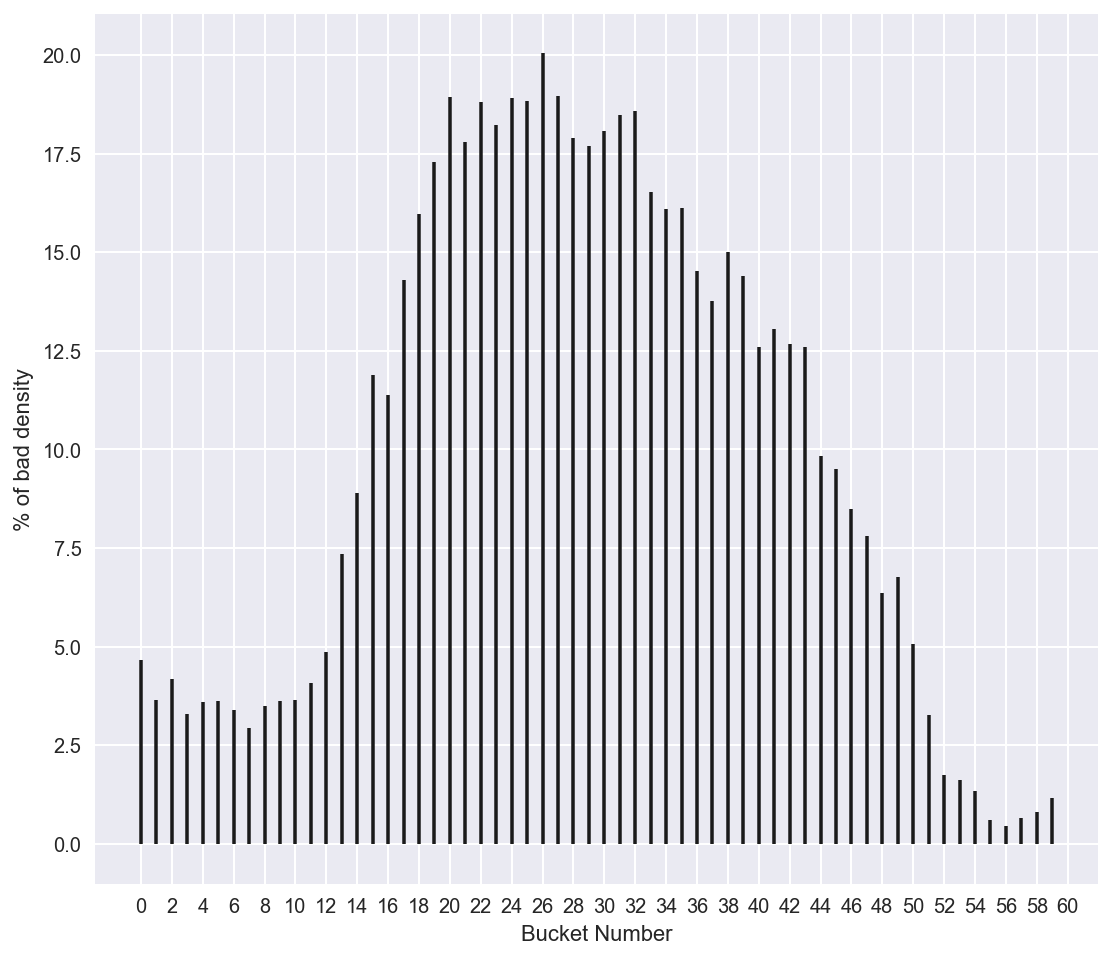

In [101]:
sns.set(palette='husl')

x = percent_bad
x_pos = np.arange(len(x))
plt.figure(figsize=(8,8))
plt.vlines(x_pos,ymin=np.zeros_like(x), ymax=x)
plt.xlabel('Bucket Number')
plt.ylabel('% of bad density')
plt.xticks(range(0,N_BUCKETS+2,2));

# in bucket 0, about 5 % objects has 0.7 < gm_sq < 1.0

# Look at the bucket25 with dense population at gmSquared 0.7 to 1.0

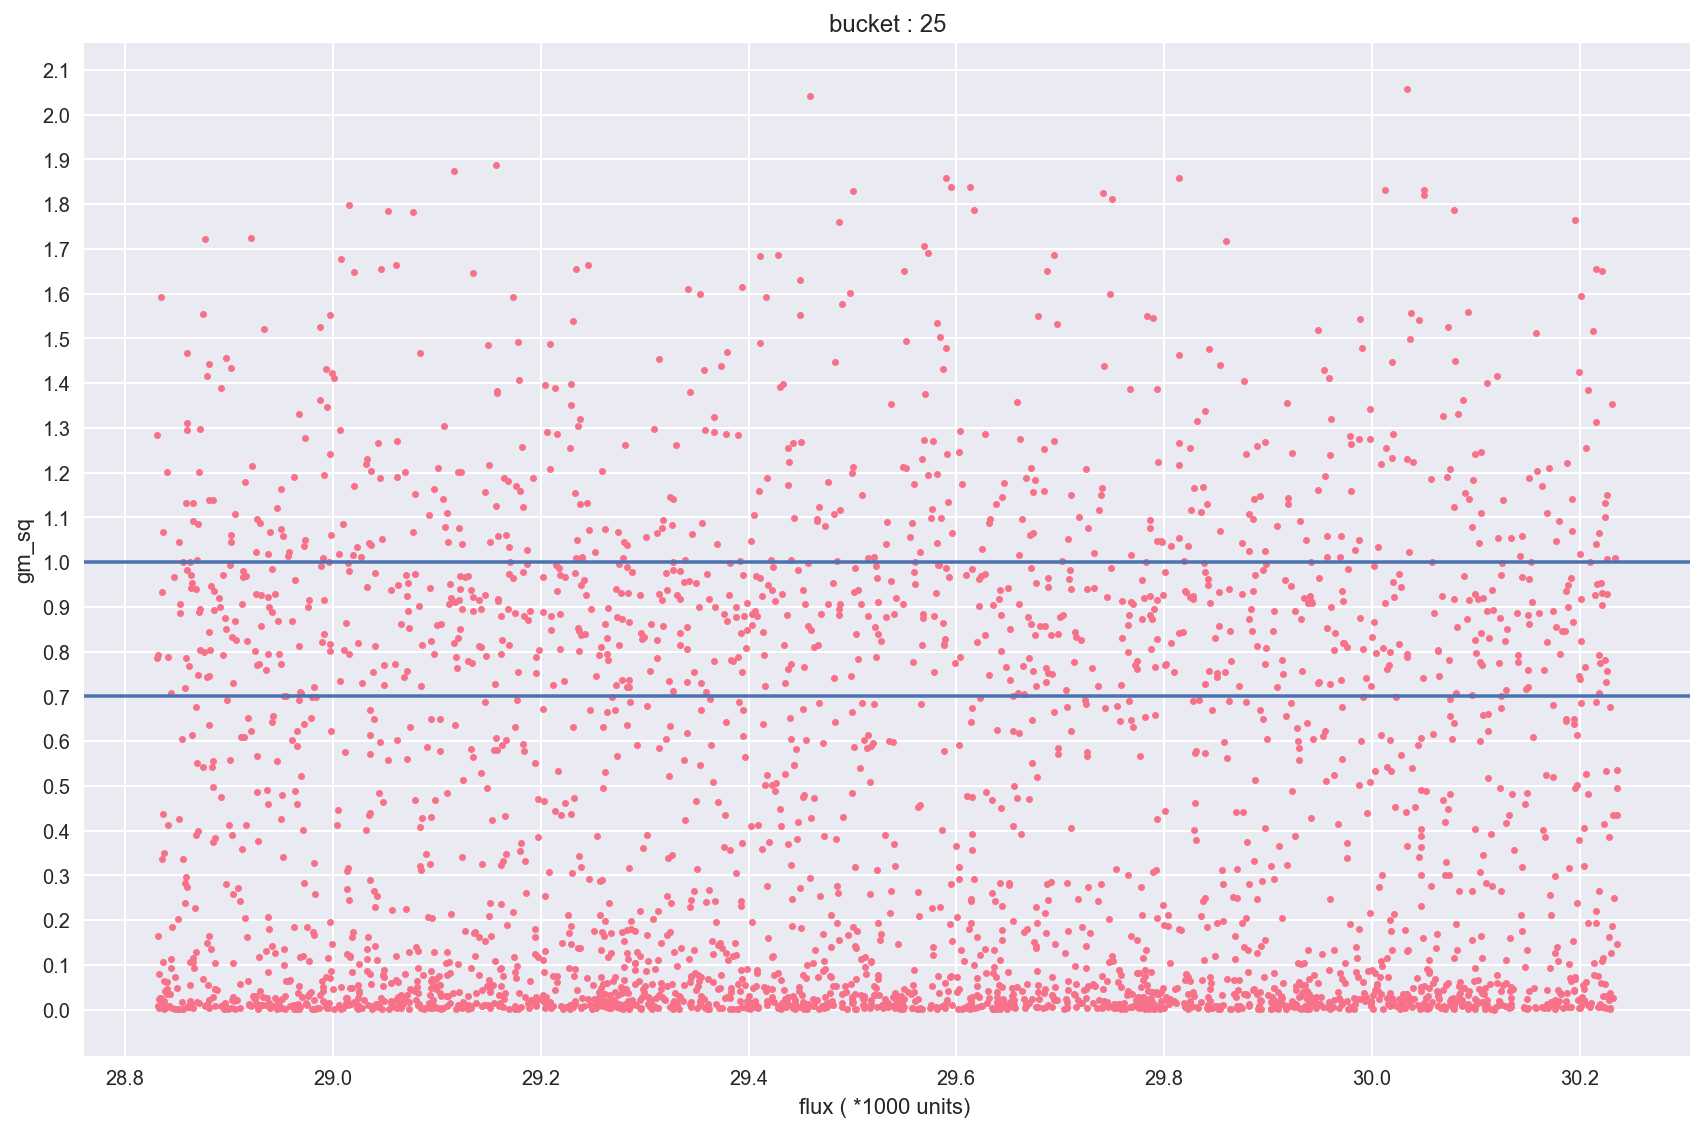

In [103]:
j = 25

plt.figure(figsize=(12,8))
x = dfn[j]['flux'].values/1000 # divide by 1000 just for plotting
y = dfn[j]['gm_sq'].values

plt.plot(x, y, '.')
plt.title('bucket : ' + str(j))
plt.xlabel('flux ( *1000 units) ')
plt.ylabel('gm_sq')

plt.axhline(0.7,c='b')
plt.axhline(1.0,c='b')
plt.yticks(np.arange(0,2.2,0.1))
plt.tight_layout()

In [30]:
bucket25 = dfn[j]
print(bucket25.shape)
bucket25.head()

(3064, 37)


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],flux[0][0],flux[1][0],flux[2][0],flux[3][0],gm[0],gm[1],gc[0],gc[1],flux,gm_sq,gc_sq
83580,45,45,45,45,5024,5023,5167,5012,942.04948,1580.787400,0.0766,0.1245,0.0555,0.0743,0.0782,0.1267,0.0558,0.0739,-1.0084,-0.1055,-1.2504,-0.0726,-1.1342,-0.1470,-1.3563,-0.0703,7765.5664,6877.3049,7340.2358,6847.7658,-1.12940,-0.08905,-1.24525,-0.10865,28830.8729,1.283474,1.562452
117530,64,64,64,64,2849,2877,2861,2809,1963.91750,244.309000,0.2448,0.2462,0.2450,0.2529,0.2433,0.2471,0.2442,0.2483,-0.0146,-0.9051,-0.0084,-0.8675,-0.0122,-0.9108,0.0084,-0.8762,7194.7260,7234.7395,7175.5338,7226.0433,-0.01150,-0.88630,-0.00190,-0.89350,28831.0426,0.785660,0.798346
17280,9,9,9,9,2489,2513,2515,2524,1988.62830,32.884575,0.0609,0.0584,0.0555,0.0596,0.0611,0.0587,0.0556,0.0595,0.3002,-0.8437,-0.2543,0.6622,0.3027,-0.7199,-0.2731,0.5646,7252.2412,7167.1137,7247.5631,7164.6740,0.02295,-0.09075,0.01480,-0.07765,28831.5920,0.008762,0.006249
8401,4,4,4,4,1883,1884,1890,1886,1521.96660,2587.501600,0.1219,0.1009,0.1826,0.1855,0.1236,0.1022,0.1838,0.1880,0.4541,0.4191,0.0415,0.2235,0.4521,0.4062,0.0376,0.1919,7177.7872,7225.5875,7188.8969,7239.4424,0.24780,0.32130,0.24485,0.29905,28831.7140,0.164639,0.149382
59935,32,32,32,32,5186,5151,5176,5165,2139.64900,1722.205700,0.1210,0.2170,0.1220,0.2762,0.1213,0.2177,0.1223,0.2788,-0.7589,0.4242,-0.9180,0.1720,-0.7687,0.4426,-0.9305,0.1679,7318.6860,7098.8086,7312.6648,7101.6244,-0.83845,0.29810,-0.84960,0.30525,28831.7838,0.791862,0.814998


In [31]:
# Look at all the file numbers (fN) that has dense population

bucket25['fN[0][0]'].nunique() # there are all 100 files which have at least one
  # bad dense population

100

In [32]:
high_gm_sq = bucket25.query("0.7 < gm_sq < 1.0")
high_gm_sq.shape

(577, 37)

In [33]:
high_gm_sq.shape[0] / bucket25.shape[0] * 100 # % of dense objects

18.83159268929504

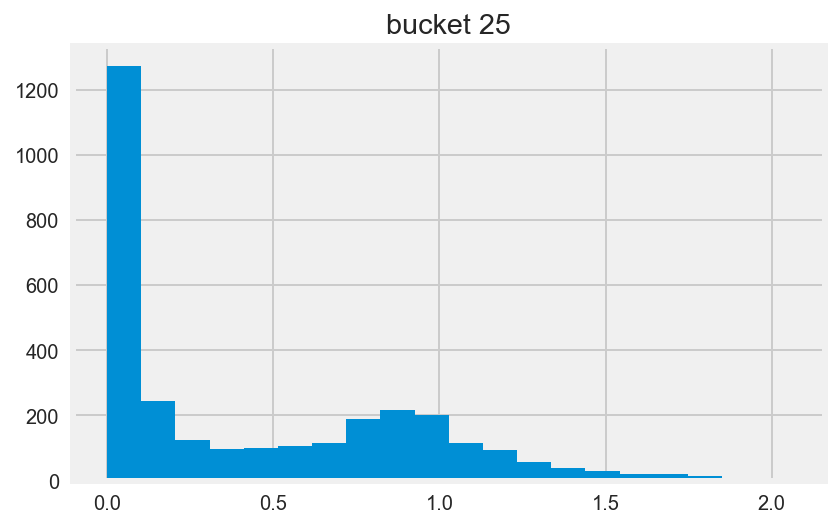

In [35]:
plt.title('bucket 25')
bucket25['gm_sq'].hist(bins=20);

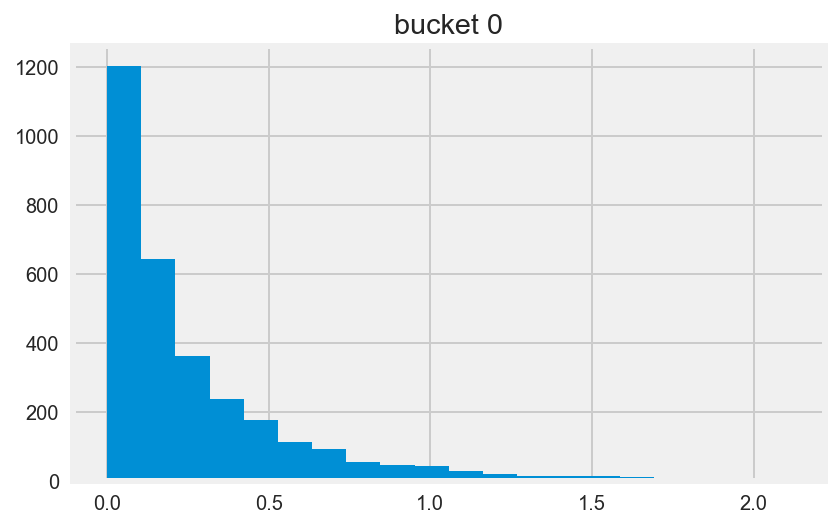

In [63]:
# compare with bucket0
plt.title('bucket 0')
dfn[0]['gm_sq'].hist(bins=20);

# Fitting cubic function after bucketing
```
In numpy polyfit the function np.polyfit(x,y,degree) gives polyfit object,
then to get coeffs we need to use np.poly1d(z) for the new values z.

The polynomial of degree deg is given below:
p(x) = p[0] * x**deg + p[1] * x**(deg-1) + ... + p[deg]
p(x) = ax**3 + bx**2 + cx + d

# first fit the polynomial and get coeffs
z = np.polyfit(x,y,3)

# then get the polynomial object to calculate new values
p = np.poly1d(z) # gives poly1d object
p.coeffs # gives coeffs which are same as z
p(1000) # gives the value of polynomial when x=1000.
```

In [ ]:
df.columns

In [ ]:
# take only mean gm gc flux in each buckets, and take unique values
gm_sq_mean = [dx['gm_sq'].mean() for dx in dfn]
gc_sq_mean = [dx['gm_sq'].mean() for dx in dfn]
flux_mean = [dx['flux'].mean() for dx in dfn]

gmSqMean_gcSqMean_fluxMean = pd.DataFrame({
    'gm_sq_mean': gm_sq_mean,
    'gc_sq_mean': gc_sq_mean,
    'flux_mean': flux_mean
})


print(gmSqMean_gcSqMean_fluxMean)

# gm_sq_mean vs flux_mean in each buckets

In [ ]:
gmSqMean_gcSqMean_fluxMean.plot.scatter(x='flux_mean',y='gm_sq_mean')

In [ ]:
x = gmSqMean_gcSqMean_fluxMean['flux_mean'].values
y = gmSqMean_gcSqMean_fluxMean['gm_sq_mean'].values

In [ ]:
# plot x=flux y=gm_sq_mean
plt.plot(x, y, '.')


# polynomial fit
degree = 3
z = np.polyfit(x,y,degree)
p = np.poly1d(z)

# polynomial plot
xp = np.linspace(x.min(), x.max(), 1000)
plt.plot(xp, p(xp), '-')
plt.xlabel('flux_mean')
plt.ylabel('gm_sq_mean')

In [ ]:
z

In [ ]:
p

In [ ]:
def plot_poly(x,y,degree, *args):
    """ Plot the data with given degree of polynomial.
    
    Example:
    plot_poly(x,y,3)
    plot_poly(x,y,3,'x','y','title')
    
    Returns: p
    
    Usage:
    x_value = 100
    p(x_value) gives the polynomial fit of x_value
    
    """
    plt.figure(figsize=(12,8))
    plt.title('')
    plt.plot(x, y,'b.')

    # polynomial fit
    z = np.polyfit(x ,y,degree)
    p = np.poly1d(z)


    # polynomial plot
    xp = np.linspace(x.min(), x.max(), 1000)
    signs = ['+' if i>0 else '-' for i in p.coeffs][::-1]
    label = '  '.join(['%s %.2g x**%i'%(signs[i], abs(p.coeffs[~i]),i) for i in reversed(range(degree+1))])
    label = label.replace('x**0','')
    label = label.replace('x**1','x')
    label = label.lstrip('+')
    plt.plot(xp, p(xp), '-',label=label)
    if len(args) > 0: plt.xlabel(args[0])
    if len(args) > 1: plt.ylabel(args[1])
    if len(args) > 2: plt.title(args[2])
    plt.legend()
    
    return plt

In [ ]:
p = plot_poly(x,y,3,'flux_mean','gm_sq_mean')

In [ ]:
plt.hist(y,bins=10)

In [ ]:
print(y)

In [ ]:
print(y.shape)

# Attempt: Fit log-normal distribution

We can fit log-normal distribution if the log(x) follows normal distribution.
We can test normality using Shapiro test.

In [ ]:
rv = np.array(y).ravel() # random variate
 

# the data is lognormal if np.log(data) is normal
pvalue = stats.shapiro(np.log(rv))[-1]

print("level of significance alpha                    = ", 0.01)
print("p-value for `accepting` lognormality of x-data = ", pvalue)
print("Conclusion: The array come from lognormal distribution" if pvalue>0.01
      else "Conclusion: The array isn't lognormal.")
 
# Note: median and mean values could significantly differ in case of lognormal distribution
print()
print('Raw mean value of x-data is              : ',  np.mean(rv)) 
print('Mean value of related normal distribution: ',  np.mean(np.log(rv))) 
print('Mapped mean value                        : ',  np.exp(np.mean(np.log(rv)))) 
  
s, loc, scale = stats.lognorm.fit(rv, floc=0) # fitting lognormal
estimated_mu = np.log(scale)
 
print("Estimated mu after fitting              :  ", estimated_mu)

In [ ]:
# y is our random variate
# get log-normal fit params
shape, loc, scale = stats.lognorm.fit(y, floc=0) # hold location to 0 while fitting

# for scipy we need shape, loc, scale
# but the log-normal distribution generally can be described by mu and sigma.
mu, sigma = np.log(scale), shape
mu, sigma

In [ ]:
# fit log-normal distribution to the data
sample = y
params = stats.lognorm.fit(sample, floc=0)

# plot sample
# x_axis = x
x_axis = np.linspace(0,10,len(sample))

plt.figure(figsize=(12,8))
plt.plot(x_axis, sample,'b.',label='Original sample')


# fit lognormal
params = stats.lognorm.fit(sample, floc=0)
y_axis = stats.lognorm.pdf(x_axis, *params)

# plot
plt.title('Fitted Lognormal (looks BAD!)')
plt.plot(x_axis, y_axis,label='Fitted Lognormal')
plt.legend()
plt.show()

# Attempt: Fit two functions 
The curve of flux vs shear shows two clear parts, one below the peak which is increasing steep, 
and another after the peak, which is decreasing more relaxedly.
I will fit two different polynomials to two parts.

## Left part

In [ ]:
# just looking all y-values
plt.title('gm-sq-mean values')
plt.plot(x,y,'b.')

In [ ]:
y_lt = y[:np.argmax(y)]
x_lt = x[:np.argmax(y)]
plt.title('gm-sq-mean values left')
plt.plot(x_lt, y_lt,'b.')

In [ ]:
plot_poly(x_lt,y_lt,3,'flux_mean','gm_sq_mean','Left Part')

In [ ]:
degree = 3
z = np.polyfit(x_lt,y_lt,degree)
p = np.poly1d(z)

t = 20000
ans = -1.36860393e-13 * t**3 + 8.08589565e-09 * t**2 -1.33709075e-04 * t + 8.54318209e-01
ans2 = p(t)

ans, ans2

## Right part

In [ ]:
# second region data
y_rt = y[np.argmax(y):-1] # I excluded one last point
x_rt = x[np.argmax(y):-1]

p = plot_poly(x_rt,y_rt,3,'flux_mean','gm_sq_mean','Right Part')

In [ ]:
plot_poly(x_lt,y_lt,3,'flux_mean','gm_sq_mean','Left Part')
plot_poly(x_rt,y_rt,3,'flux_mean','gm_sq_mean','Right Part')